# Step 1: Define the problem.

# Step 2: Collect the data.

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")

In [3]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

## We should now look at our data's properties.

In [5]:
data.shape

(21597, 21)

In [6]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [7]:
del data['date']
del data['id']

<AxesSubplot:>

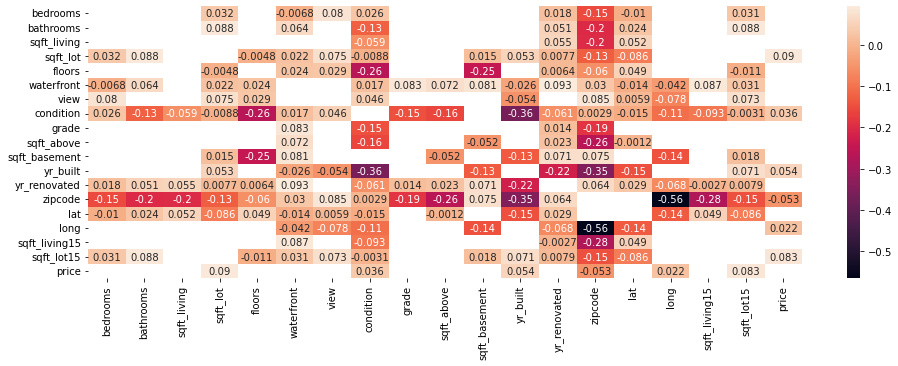

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (16,5))
sns.heatmap(data.corr()[data.corr() < .1], annot=True)

In [9]:
del data['lat']
del data['long']

#The reason why zipcode is being removed is becuase it has little to no correlation with a majority of columns.
del data['zipcode']

# Step 3: Data Cleaning

In [10]:
#For standardizing heads, I like to go with all lowercase and replace any spaces with _.
#I also like to make headers easier to understand with the need for extra documentation.
#I used a loop to get a column name and its correlated index, this will help when changing specific column headers.

for x in range(len(data.columns)):
    print(x, data.columns[x])

0 bedrooms
1 bathrooms
2 sqft_living
3 sqft_lot
4 floors
5 waterfront
6 view
7 condition
8 grade
9 sqft_above
10 sqft_basement
11 yr_built
12 yr_renovated
13 sqft_living15
14 sqft_lot15
15 price


In [11]:
#Since the data is mostly stanrdized as is, I will just need to replace column names with more descripitive headers.
#To do this, I created a dictionary of all the changes I want to make
#With this dictionary I am able to check if theres a replacement for a header, if there isnt, the header will stay the same;
#But if there is, it will get the value from the dictionary instead.
replacements_dic = {
    5 : "view_of_waterfront"
}
headers_replacements = []

for x in range(len(data.columns)):
    if x in replacements_dic:
        headers_replacements.append(replacements_dic[x])
    else:
        headers_replacements.append(data.columns[x])
data.columns = headers_replacements

In [12]:
#Use same for loop to check the headers
#As we can see the change I wanted to make 
for x in range(len(data.columns)):
    print(x, data.columns[x])

0 bedrooms
1 bathrooms
2 sqft_living
3 sqft_lot
4 floors
5 view_of_waterfront
6 view
7 condition
8 grade
9 sqft_above
10 sqft_basement
11 yr_built
12 yr_renovated
13 sqft_living15
14 sqft_lot15
15 price


Now we move onto our next task:</br >
~~-Standardize Headers~~ </br >
-Check Data Types</br >
-Check for duplicates</br >
-Check for Null Values</br >
&nbsp;&nbsp;&nbsp;&nbsp;-Data.isna().sum()</br >
&nbsp;&nbsp;&nbsp;&nbsp;-Data.info()</br >
-Check unique values for cat columns</br >
-Make sure that numericals are finite numbers</br >

In [13]:
#Now we will verify that the data types match the values we have. To do this I will forst use data.head()
#Then I will look at our data.dtypes to verify that it mathes.

data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view_of_waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000


In [14]:
#As we can see below, the data types look correct.
data.dtypes

bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
view_of_waterfront      int64
view                    int64
condition               int64
grade                   int64
sqft_above              int64
sqft_basement           int64
yr_built                int64
yr_renovated            int64
sqft_living15           int64
sqft_lot15              int64
price                   int64
dtype: object

In [15]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Now we move onto our next task:</br >
~~-Standardize Headers~~ </br >
~~-Check Data Types</br >~~
-Check for duplicates</br >
-Check for Null Values</br >
&nbsp;&nbsp;&nbsp;&nbsp;-Data.isna().sum()</br >
&nbsp;&nbsp;&nbsp;&nbsp;-Data.info()</br >
-Check unique values for cat columns</br >
-Make sure that numericals are finite numbers</br >

In [16]:
#We will now check for duplicates.
#To do so, the simplest method would be data.duplicated; Which returns a series of True/False values.
#With a series we can use .sum() to get a count on all the True, which will indicate if there are duplicates.
data.duplicated().sum()

6

In [17]:
#Now before wildy removing data, I will look at the data to ensure that they are duplicates.
data[data.duplicated(keep = False)]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view_of_waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
547,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,1070,928,259950
3946,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,2520,14789,550000
3947,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,2520,14789,550000
4348,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,1070,928,259950
14968,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,2290,7984,585000
14969,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,2290,7984,585000
19620,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,1510,1352,529500
20037,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,1880,3078,555000
20038,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,1880,3078,555000
20508,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,1510,1352,529500


In [18]:
#Now that we've ensured that the duplicates are in fact duplicates, we will drop those rows using .dropna()

data = data.dropna()

Now we move onto our next task:</br >
~~-Standardize Headers~~ </br >
~~-Check Data Types</br >~~
~~-Check for duplicates</br >~~
-Check for Null Values</br >
&nbsp;&nbsp;&nbsp;&nbsp;-Data.isna().sum()</br >
&nbsp;&nbsp;&nbsp;&nbsp;-Data.info()</br >
-Check unique values for cat columns</br >
-Make sure that numericals are finite numbers</br >

In [19]:
#Now we will check for null values. There is 2 ways to approach this.
#data.isna() and data.info()

#data.isna makes a DataFrame using the same structure as our data, but the difference is that it replace null values with True
#values and replaces non-null values with False values.
#Since we only have True and False values, and every column in a pandas DataFrame is a series, .sum() will work in this instance
#.sum() will give us the amount of null values for every column.
data.isna().sum()

bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
view_of_waterfront    0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
sqft_living15         0
sqft_lot15            0
price                 0
dtype: int64

In [20]:
#The other method we can use to check is data.info()
#The "Non-Null Count" should match the amount of rows we have, which in this case it does based on the "RangeIndex"
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21597 non-null  int64  
 1   bathrooms           21597 non-null  float64
 2   sqft_living         21597 non-null  int64  
 3   sqft_lot            21597 non-null  int64  
 4   floors              21597 non-null  float64
 5   view_of_waterfront  21597 non-null  int64  
 6   view                21597 non-null  int64  
 7   condition           21597 non-null  int64  
 8   grade               21597 non-null  int64  
 9   sqft_above          21597 non-null  int64  
 10  sqft_basement       21597 non-null  int64  
 11  yr_built            21597 non-null  int64  
 12  yr_renovated        21597 non-null  int64  
 13  sqft_living15       21597 non-null  int64  
 14  sqft_lot15          21597 non-null  int64  
 15  price               21597 non-null  int64  
dtypes: f

Seeing that there are no null values, we shall move onto the next task:</br >
~~-Standardize Headers~~ </br >
~~-Check Data Types</br >
-Check for duplicates</br >
-Check for Null Values</br >~~
&nbsp;&nbsp;&nbsp;&nbsp;~~-Data.isna().sum()</br >~~
&nbsp;&nbsp;&nbsp;&nbsp;~~-Data.info()</br >~~
-Check unique values for cat columns</br >
-Make sure that numericals are finite numbers</br >

In [21]:
#Now we check our values in our categorical columns to ensure we dont have any redundant information.
#But due to the information we are working with, this is unnecessary since all of our columns are numerical.

Due to the lack of categorical columns we can move onto the final task:</br >
-~~Standardize Headers~~ </br >
-~~Check Data Types~~</br >
-~~Check for duplicates~~</br >
-~~Check for Null Values~~</br >
&nbsp;&nbsp;&nbsp;&nbsp;-~~Data.isna().sum()</br >~~
&nbsp;&nbsp;&nbsp;&nbsp;-~~Data.info()</br >~~
-~~Check unique values for cat columns</br >~~
-Make sure that numericals are finite numbers</br >

In [22]:
#To check for infinite numbers, numpy as a built in function that returns a series of True and False values
#So once again, since it returns a series, we can use .sum() to get a count of True values, which in this instance represent
#infinite values.
import numpy as np
  
count = np.isinf(data).values.sum()
count

0

# EDA (Explorative Data Analysis)

In [23]:
#Saving the original amount of rows in our data into a variable for seeing how many rows of data we lost.
o_size = data.shape[0]

# ------------------------------------------------------------------
# With bedrooms and such dataas numericals, not log transformed.

In [24]:
numericals_1 = data.select_dtypes(np.number)
categoricals_1 = data.select_dtypes(object)
data_1 = data

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


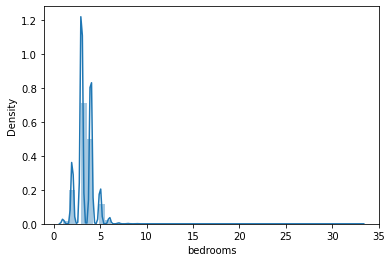

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


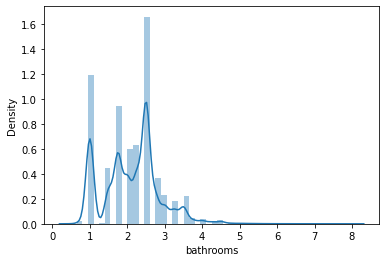

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


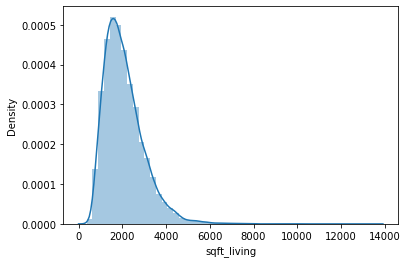

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


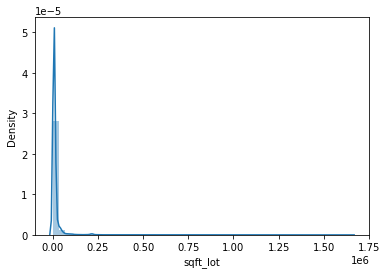

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


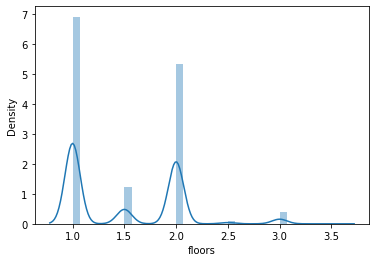

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


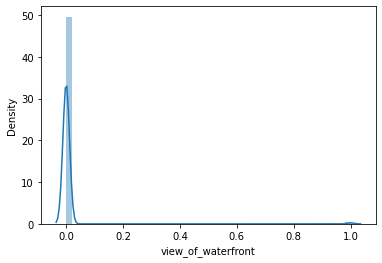

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


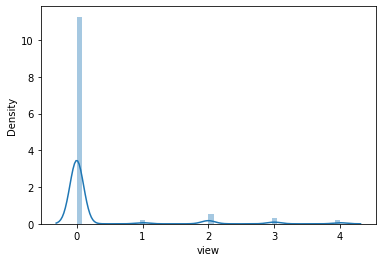

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


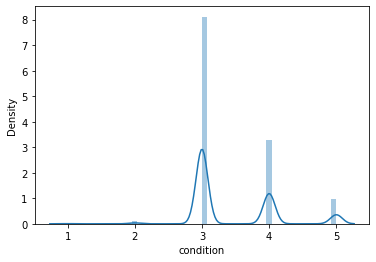

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


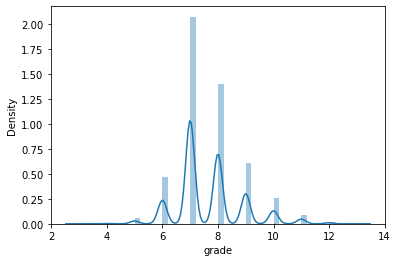

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


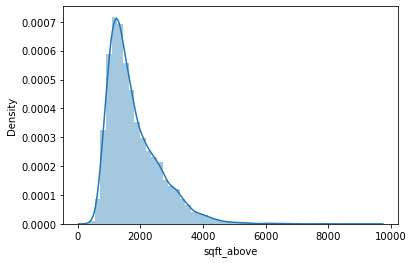

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


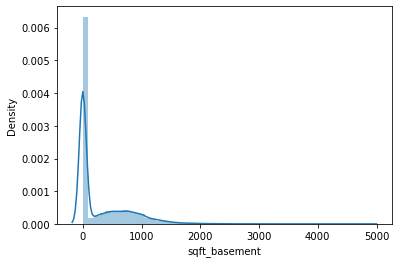

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


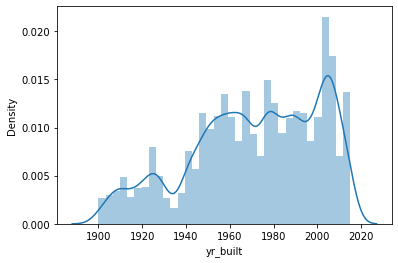

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


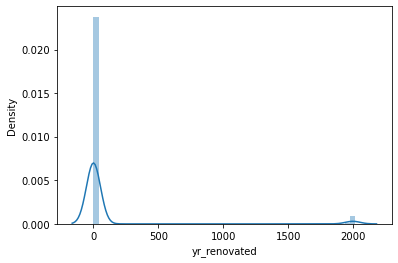

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


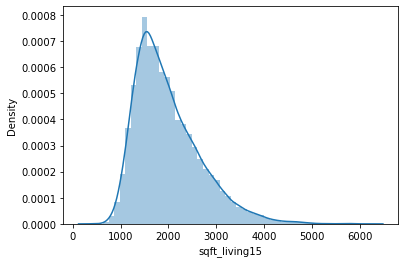

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


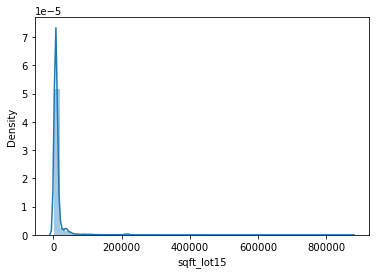

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


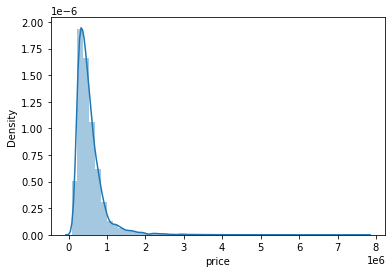

In [25]:
# So I will now be checking for outliers in my data, to do this I will be creating a for loop to graph a dist plot for every
# column in my data set.
# I will be looking for any sort of trailing or "tails"

for x in numericals_1.columns:
    sns.distplot(data_1[x])
    plt.show()

In [26]:
iqr = np.percentile(data['bedrooms'],75) - np.percentile(data['bedrooms'],25)
upper_limit = np.percentile(data['bedrooms'],75) + 1.5*iqr
lower_limit = np.percentile(data['bedrooms'],25) - 1.5*iqr
data_1 = data_1[data['bedrooms'] < upper_limit]

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


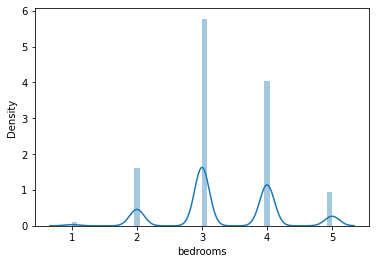

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


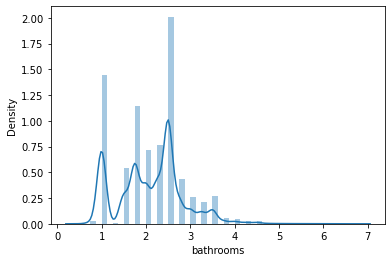

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


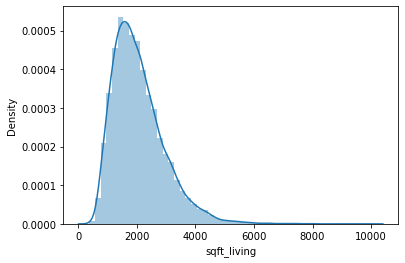

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


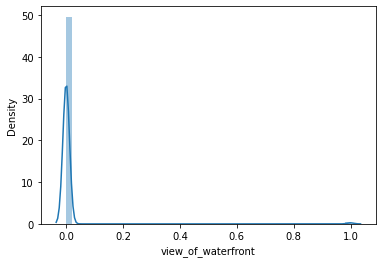

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


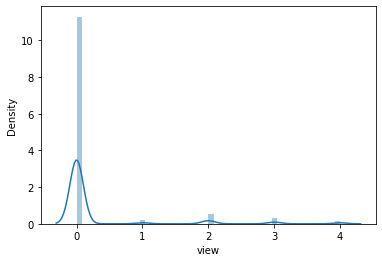

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


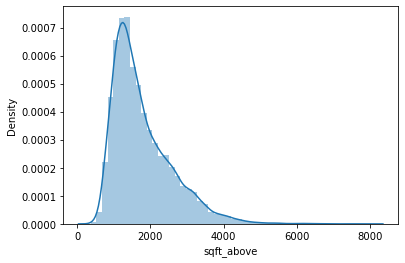

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


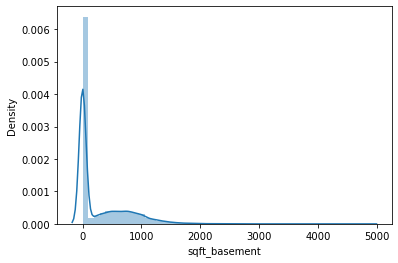

In [27]:
# Now I well recheck my graphs. I am only going to check what I believed stood out before.

graphs_to_check = ['bedrooms', "bathrooms", 'sqft_living', 'view_of_waterfront', 'view', 'sqft_above', 'sqft_basement']

for x in graphs_to_check:
    sns.distplot(data_1[x])
    plt.show()

The following still have trails, so I will now remove them individually:
sqft_living
sqft_above
sqft_basement

C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/2978430951.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_1 = data_1[data['sqft_living']<upper_limit]


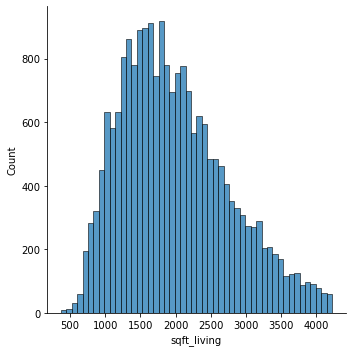

In [28]:
iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
data_1 = data_1[data['sqft_living']<upper_limit]

sns.displot(data_1['sqft_living'])

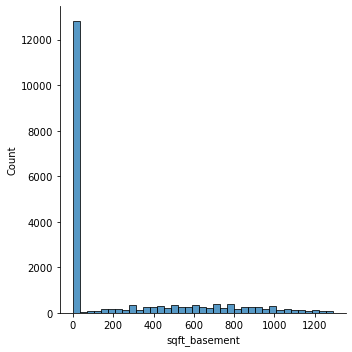

In [29]:
iqr = np.percentile(data_1['sqft_basement'],75) - np.percentile(data_1['sqft_basement'],25)
upper_limit = np.percentile(data_1['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(data_1['sqft_basement'],25) - 1.5*iqr
data_1 = data_1[data_1['sqft_basement']<upper_limit]

sns.displot(data_1['sqft_basement'])

In [30]:
data_lost = o_size - data_1.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

Data lost: 1343 or 6.22%.


In [31]:
# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_1['price']
del data_1['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_num = data_1.select_dtypes(np.number)
X_cat = data_1.select_dtypes(object)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

In [32]:
# I will now create my models. I will make 3 different models so that I can get the best result.
# Alongside creating my models I will be testing them and getting scors
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [33]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view_of_waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

R2 score is 0.6150862995735363
R2 score is 0.6128609204729216
R2 score is 0.6042156756456019


# ------------------------------------------------------------------
# With bedrooms and such data as numericals, log transformed.

In [35]:
data_2 = data
data_2.shape

(21597, 16)

In [36]:
#Here I will be using log transoformations on data that are too skewed
import math

graphs_to_check = ['sqft_living', 'sqft_above', 'sqft_basement']

print(data_2.shape)
data_2 = data_2[(data_2['sqft_living'] > 0) & (data_2['sqft_above'] > 0) & (data_2['sqft_basement']> 0)]
print(data_2.shape)

for x in graphs_to_check:
    data_2[x] = np.log(data_2[x])


(21597, 16)
(8487, 16)


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/182939509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[x] = np.log(data_2[x])


C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


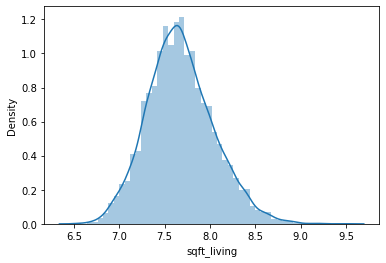

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


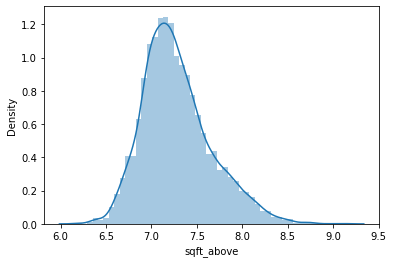

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


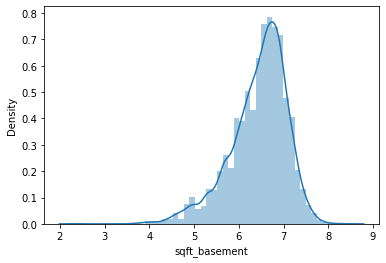

In [37]:
for x in graphs_to_check:
    sns.distplot(data_2[x])
    plt.show()

In [38]:
data_lost = o_size - data_2.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

Data lost: 13110 or 60.7%.


In [39]:
# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_2['price']
del data_2['price']

X_num = data_2.select_dtypes(np.number)
X_cat = data_2.select_dtypes(object)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

R2 score is 0.6524266457327199
R2 score is 0.6346130726946851
R2 score is 0.6281358672987716


# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, not log transformed.

In [41]:
#In this model I will be changing Numerical columns with categorical behaviours into categoricals for the model.
numericals_3 = data.select_dtypes(np.number)
categoricals_3 = data.select_dtypes(object)
data_3 = data
data_3.shape

(21597, 16)

In [42]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view_of_waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [43]:
#I will first remove known outliers and then split my columns.
iqr = np.percentile(data_3['sqft_basement'],75) - np.percentile(data_3['sqft_basement'],25)
upper_limit = np.percentile(data_3['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(data_3['sqft_basement'],25) - 1.5*iqr
data_3 = data_3[data_3['sqft_basement']<upper_limit]

iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
data_3 = data_3[data['sqft_living']<upper_limit]

data_lost = o_size - data_3.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size,2 * 100)) + "%.")

Data lost: 925 or 0.04283002268833634%.


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/1991743504.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_3 = data_3[data['sqft_living']<upper_limit]


In [44]:
#The categories we will be putting into the categorical columns are:
# view
# condition
# grade
# view_of_water_front

X_cat = data_3[['view','condition','grade','view_of_waterfront']]
data_3 = data_3.drop(['view','condition','grade','view_of_waterfront'], axis = 1)
X_num = data_3

In [45]:
# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_3['price']
del data_3['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

R2 score is 0.6065745432965577
R2 score is 0.606646047388387
R2 score is 0.6078664093558618


# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, log transformed.

In [47]:
data_6 = data

In [48]:
graphs_to_check = ['sqft_living', 'sqft_above', 'sqft_basement']

data_6 = data_6[(data_6['sqft_living'] > 0) & (data_6['sqft_above'] > 0) & (data_6['sqft_basement']> 0)]

for x in graphs_to_check:
    data_6[x] = np.log(data_6[x])

C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/2602275277.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6[x] = np.log(data_6[x])


In [49]:
data_lost = o_size - data_6.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

Data lost: 13110 or 60.7%.


In [50]:
data_6.shape

(8487, 16)

In [51]:
#The categories we will be putting into the categorical columns are:
# view
# condition
# grade
# view_of_water_front

X_cat = data_6[['view','condition','grade','view_of_waterfront']]
data_6 = data_6.drop(['view','condition','grade','view_of_waterfront'], axis = 1)
X_num = data_6

In [52]:
# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_6['price']
del data_6['price']

transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

R2 score is 0.7029244836079993
R2 score is 0.6891845497168609
R2 score is 0.6910029706014318


# ------------------------------------------------------------------
# With bedrooms and such data as numericals, not log transformed, with location data.

In [54]:
#We must reimport to bring back location data we had previously delted
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']

In [55]:
#In this model I will be changing Numerical columns with categorical behaviours into categoricals for the model.
data_4 = data
data_4.shape

(21597, 19)

In [56]:
# So now we have lat, long, and zipcode
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [57]:
#I will first remove known outliers and then split my columns.
iqr = np.percentile(data_4['sqft_basement'],75) - np.percentile(data_4['sqft_basement'],25)
upper_limit = np.percentile(data_4['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(data_4['sqft_basement'],25) - 1.5*iqr
data_4 = data_4[data_4['sqft_basement']<upper_limit]

iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
data_4 = data_4[data['sqft_living']<upper_limit]

data_lost = o_size - data_4.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

Data lost: 925 or 4.28%.


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/827555770.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_4 = data_4[data['sqft_living']<upper_limit]


In [58]:
# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_4['price']
del data_4['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_num = data_4.select_dtypes(np.number)
X_cat = data_4.select_dtypes(object)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

R2 score is 0.6723835932233915
R2 score is 0.6644921118217786
R2 score is 0.665419806272227


# ------------------------------------------------------------------
# With bedrooms and such data as numericals, log transformed, with location data.

In [60]:
#We must reimport to bring back location data we had previously delted
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']

In [61]:
data_7 = data

In [62]:
graphs_to_check = ['sqft_living', 'sqft_above', 'sqft_basement']

data_7 = data_7[(data_7['sqft_living'] > 0) & (data_7['sqft_above'] > 0) & (data_7['sqft_basement']> 0)]

for x in graphs_to_check:
    data_7[x] = np.log(data_7[x])

C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/886785972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7[x] = np.log(data_7[x])


In [63]:
data_lost = o_size - data_7.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

Data lost: 13110 or 60.7%.


In [64]:
# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_7['price']
del data_7['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_num = data_7.select_dtypes(np.number)
X_cat = data_7.select_dtypes(object)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

R2 score is 0.6831047922905517
R2 score is 0.6671995312737808
R2 score is 0.6604971609900059


# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, not log transformed, with location data.

In [66]:
#We must reimport to bring back location data we had previously delted
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_11 = data

#I will first remove known outliers and then split my columns.
iqr = np.percentile(data_11['sqft_basement'],75) - np.percentile(data_11['sqft_basement'],25)
upper_limit = np.percentile(data_11['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(data_11['sqft_basement'],25) - 1.5*iqr
data_11 = data_11[data_11['sqft_basement']<upper_limit]

iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
data_11 = data_11[data['sqft_living']<upper_limit]

data_lost = o_size - data_11.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_11['price']
del data_11['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_cat = data_11[['view','condition','grade','waterfront']]
data_10 = data_11.drop(['view','condition','grade','waterfront'], axis = 1)
X_num = data_11


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 925 or 4.28%.
R2 score is 0.6839266819681805
R2 score is 0.6783981058585534
R2 score is 0.6792713033837878


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/687280556.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_11 = data_11[data['sqft_living']<upper_limit]


# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, log transformed, with location data.

In [67]:
#We must reimport to bring back location data we had previously delted
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_12 = data

graphs_to_check = ['sqft_living', 'sqft_above', 'sqft_basement']

data_12 = data_12[(data_12['sqft_living'] > 0) & (data_12['sqft_above'] > 0) & (data_12['sqft_basement']> 0)]

for x in graphs_to_check:
    data_12[x] = np.log(data_12[x])

data_lost = o_size - data_12.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_12['price']
del data_12['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_cat = data_12[['view','condition','grade','waterfront']]
data_10 = data_12.drop(['view','condition','grade','waterfront'], axis = 1)
X_num = data_12


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 13110 or 60.7%.
R2 score is 0.7375352924696797
R2 score is 0.7259128413562481
R2 score is 0.725793697373976


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/1124119781.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_12[x] = np.log(data_12[x])


# ------------------------------------------------------------------
# With bedrooms and such data as numericals, not log transformed, with Feature Extraction

In [68]:
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_5 = data
del data_5['lat']
del data_5['long']
del data_5['zipcode']

In [69]:
data_5.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [70]:
def clean_columns(column, data_in):
    out = []
    if column == "waterfront":
        for x in data_in:
            if x == 0:
                out.append("False")
            else:
                out.append("True")
    elif column == "yr_built":
        for x in data_in:
            out.append(2015  - x)
    return out

data_5['waterfront'] = clean_columns("waterfront", data_5["waterfront"])
data_5['years_old'] = clean_columns("yr_built", data_5["yr_built"])
del data_5['yr_built']

In [71]:
#I will first remove known outliers and then split my columns.
iqr = np.percentile(data_5['sqft_basement'],75) - np.percentile(data_5['sqft_basement'],25)
upper_limit = np.percentile(data_5['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(data_5['sqft_basement'],25) - 1.5*iqr
data_5 = data_5[data_5['sqft_basement']<upper_limit]

iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
data_5 = data_5[data['sqft_living']<upper_limit]

data_lost = o_size - data_5.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_5['price']
del data_5['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_num = data_5.select_dtypes(np.number)
X_cat = data_5.select_dtypes(object)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 925 or 4.28%.
R2 score is 0.6011152904560916
R2 score is 0.5948540394383615
R2 score is 0.5950882195964431


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/543677958.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_5 = data_5[data['sqft_living']<upper_limit]


# ------------------------------------------------------------------
# With bedrooms and such data as numericals, log transformed, with Feature Extraction

In [72]:
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_8 = data

In [73]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [74]:
def clean_columns(column, data_in):
    out = []
    if column == "view_of_waterfront":
        for x in data_in:
            if x == 0:
                out.append("False")
            else:
                out.append("True")
    elif column == "yr_built":
        for x in data_in:
            out.append(2015  - x)
    return out

data_8['waterfront'] = clean_columns("view_of_waterfront", data_8["waterfront"])
data_8['years_old'] = clean_columns("yr_built", data_8["yr_built"])
del data_8['yr_built']

In [75]:
graphs_to_check = ['sqft_living', 'sqft_above', 'sqft_basement']

data_8 = data_8[(data_8['sqft_living'] > 0) & (data_8['sqft_above'] > 0) & (data_8['sqft_basement']> 0)]

for x in graphs_to_check:
    data_8[x] = np.log(data_8[x])

data_lost = o_size - data_8.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_8['price']
del data_8['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_num = data_8.select_dtypes(np.number)
X_cat = data_8.select_dtypes(object)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 13110 or 60.7%.
R2 score is 0.6831047922905518
R2 score is 0.667199531273781
R2 score is 0.660497160990006


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/2387814960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_8[x] = np.log(data_8[x])


# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, without log transformed, with Feature Extraction

In [76]:
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_10 = data

In [77]:
def clean_columns(column, data_in):
    out = []
    if column == "waterfront":
        for x in data_in:
            if x == 0:
                out.append("False")
            else:
                out.append("True")
    elif column == "yr_built":
        for x in data_in:
            out.append(2015  - x)
    return out

data_10['waterfront'] = clean_columns("waterfront", data_10["waterfront"])
data_10['years_old'] = clean_columns("yr_built", data_10["yr_built"])
del data_10['yr_built']

In [78]:
#I will first remove known outliers and then split my columns.
iqr = np.percentile(data_10['sqft_basement'],75) - np.percentile(data_10['sqft_basement'],25)
upper_limit = np.percentile(data_10['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(data_10['sqft_basement'],25) - 1.5*iqr
data_10 = data_10[data_10['sqft_basement']<upper_limit]

iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
data_10 = data_10[data['sqft_living']<upper_limit]


data_lost = o_size - data_10.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_10['price']
del data_10['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#The categories we will be putting into the categorical columns are:
# view
# condition
# grade
# view_of_water_front

X_cat = data_10[['view','condition','grade','waterfront']]
data_10 = data_10.drop(['view','condition','grade','waterfront'], axis = 1)
X_num = data_10


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 925 or 4.28%.
R2 score is 0.6839279677514031
R2 score is 0.678448309983388
R2 score is 0.6793016408364445


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/822509871.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_10 = data_10[data['sqft_living']<upper_limit]


# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, log transformed, with Feature Extraction

In [79]:
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_9 = data

In [80]:
def clean_columns(column, data_in):
    out = []
    if column == "waterfront":
        for x in data_in:
            if x == 0:
                out.append("False")
            else:
                out.append("True")
    elif column == "yr_built":
        for x in data_in:
            out.append(2015  - x)
    return out

data_9['waterfront'] = clean_columns("waterfront", data_9["waterfront"])
data_9['years_old'] = clean_columns("yr_built", data_9["yr_built"])
del data_9['yr_built']

In [81]:
graphs_to_check = ['sqft_living', 'sqft_above', 'sqft_basement']

data_9 = data_9[(data_9['sqft_living'] > 0) & (data_9['sqft_above'] > 0) & (data_9['sqft_basement']> 0)]

for x in graphs_to_check:
    data_9[x] = np.log(data_9[x])

data_lost = o_size - data_9.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_9['price']
del data_9['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#The categories we will be putting into the categorical columns are:
# view
# condition
# grade
# view_of_water_front

X_cat = data_9[['view','condition','grade','waterfront']]
data_9 = data_9.drop(['view','condition','grade','waterfront'], axis = 1)
X_num = data_9


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 13110 or 60.7%.
R2 score is 0.7376229616996998
R2 score is 0.7259019216984328
R2 score is 0.7282073527048576


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/2053889954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9[x] = np.log(data_9[x])


# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, log transformed, with Feature Extraction and Location Features

In [82]:
#We must reimport to bring back location data we had previously delted
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_13 = data

graphs_to_check = ['sqft_living', 'sqft_above', 'sqft_basement']

data_13 = data_13[(data_13['sqft_living'] > 0) & (data_13['sqft_above'] > 0) & (data_13['sqft_basement']> 0)]

for x in graphs_to_check:
    data_13[x] = np.log(data_13[x])

data_lost = o_size - data_13.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

def clean_columns(column, data_in):
    out = []
    if column == "waterfront":
        for x in data_in:
            if x == 0:
                out.append("False")
            else:
                out.append("True")
    elif column == "yr_built":
        for x in data_in:
            out.append(2015  - x)
    return out

data_13['waterfront'] = clean_columns("waterfront", data_13["waterfront"])
data_13['years_old'] = clean_columns("yr_built", data_13["yr_built"])
del data_13['yr_built']

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_13['price']
del data_13['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_cat = data_13[['view','condition','grade','waterfront','waterfront']]
data_10 = data_13.drop(['view','condition','grade','waterfront'], axis = 1)
X_num = data_13.select_dtypes(np.number)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 13110 or 60.7%.
R2 score is 0.7375187866893791
R2 score is 0.7259457315499565
R2 score is 0.7256931148959558


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/521765234.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_13[x] = np.log(data_13[x])
C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/521765234.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_13['waterfront'] = clean_columns("waterfront", data_13["waterfront"])
C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/521765234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

# ------------------------------------------------------------------
# With bedrooms and such data as categoricals, not log transformed, with Feature Extraction and Location Features

In [83]:
#We must reimport to bring back location data we had previously delted
data = pd.read_excel("./data_mid_bootcamp_project_regression/regression_data.xls")
del data['date']
del data['id']
data_14 = data

#I will first remove known outliers and then split my columns.
iqr = np.percentile(data_14['sqft_basement'],75) - np.percentile(data_14['sqft_basement'],25)
upper_limit = np.percentile(data_14['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(data_14['sqft_basement'],25) - 1.5*iqr
data_14 = data_14[data_14['sqft_basement']<upper_limit]

iqr = np.percentile(data['sqft_living'],75) - np.percentile(data['sqft_living'],25)
upper_limit = np.percentile(data['sqft_living'],75) + 1.5*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1.5*iqr
data_14 = data_14[data['sqft_living']<upper_limit]

data_lost = o_size - data_14.shape[0]
print("Data lost: " + str(data_lost) + " or " + str(round(data_lost/o_size * 100,2)) + "%.")

def clean_columns(column, data_in):
    out = []
    if column == "waterfront":
        for x in data_in:
            if x == 0:
                out.append("False")
            else:
                out.append("True")
    elif column == "yr_built":
        for x in data_in:
            out.append(2015  - x)
    return out

data_14['waterfront'] = clean_columns("waterfront", data_14["waterfront"])
data_14['years_old'] = clean_columns("yr_built", data_14["yr_built"])
del data_14['yr_built']

# Now we transform/scale and encode
# I will be using standard scaling and one hot encoding
# I will aslo be seperating our Y from our data

Y = data_14['price']
del data_14['price']

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_cat = data_14[['view','condition','grade','waterfront','waterfront']]
data_14 = data_14.drop(['view','condition','grade','waterfront'], axis = 1)
X_num = data_14.select_dtypes(np.number)


transformer = StandardScaler().fit(X_num)
scaled_x = transformer.transform(X_num)

encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
X = np.concatenate((scaled_x, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
print("R2 score is", r2_score(y_test, predictions))

Data lost: 925 or 4.28%.
R2 score is 0.6839255552354149
R2 score is 0.678449872917592
R2 score is 0.679300667768763


C:\Users\Alex\AppData\Local\Temp/ipykernel_5992/625785228.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_14 = data_14[data['sqft_living']<upper_limit]


In [84]:
out = []
for x in range(data_5.shape[0]):
    if data_5.iloc(0)[x]["sqft_above"] - data_5.iloc(0)[x]["sqft_living"] > 0:
        out.append(data_5.iloc(0)[x]["sqft_above"] - data_5.iloc(0)[x]["sqft_living"])
out

[]

In [88]:
data[['sqft_above','sqft_living']].head()

,sqft_above,sqft_living
0,1180,1180
1,2170,2570
2,770,770
3,1050,1960
4,1680,1680


In [ ]:
d